In [39]:

import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

In [40]:
!git clone https://github.com/kika007/Reverb_notebook.git

fatal: destination path 'Reverb_notebook' already exists and is not an empty directory.


In [41]:
#DATA LOADING

impulse_responses = {
    'big_hall': '/content/Reverb_notebook/Impulse_response/BIG HALL.wav',
    'medium_room': '/content/Reverb_notebook/Impulse_response/MEDIUM DAMPING ROOM.wav',
    'small_church': '/content/Reverb_notebook/Impulse_response/SMALL CHURCH.wav'
}


audio_file = '/content/Reverb_notebook/Audio_samples/clean-guitar-2.wav'
dry_signal , SR_audio = sf.read(audio_file)
info = sf.info(audio_file)
impulse_response, SR_response = sf.read(impulse_responses['big_hall'])
ratio = 0.1
ratio = np.clip(ratio, 0, 1)


if dry_signal.ndim == 2 and dry_signal.shape[1] == 2:
    dry_signal = np.mean(dry_signal, axis=1)

if impulse_response.ndim == 2 and impulse_response.shape[1] == 2:
    impulse_response = np.mean(impulse_response, axis=1)

if SR_response != SR_audio:
    impulse_response = librosa.resample(impulse_response, orig_sr=SR_response, target_sr=SR_audio)

#-------------------------------------------------------------------------------------------------------

In [42]:
# REVERB FUNCTION
def apply_reverb(dry_signal, impulse_response, ratio):

    wet_signal = signal.convolve(dry_signal, impulse_response, mode='full')

    dry_signal_normalized = dry_signal / np.max(np.abs(dry_signal))

    dry_signal_padded = np.pad(dry_signal_normalized, (0, len(wet_signal) - len(dry_signal_normalized)), 'constant', constant_values=0)

    wet_signal /= np.max(np.abs(wet_signal))

    mixed_signal = (1 - ratio) * dry_signal_padded + ratio * wet_signal

    mixed_signal /= np.max(np.abs(mixed_signal))

    return mixed_signal

#------------------------------------------------------------------------------------------------------------------

In [43]:
#APPLYING REVERB
wet_signal = apply_reverb(dry_signal, impulse_response,ratio)

#------------------------------------------------------------------------------------------------------------------

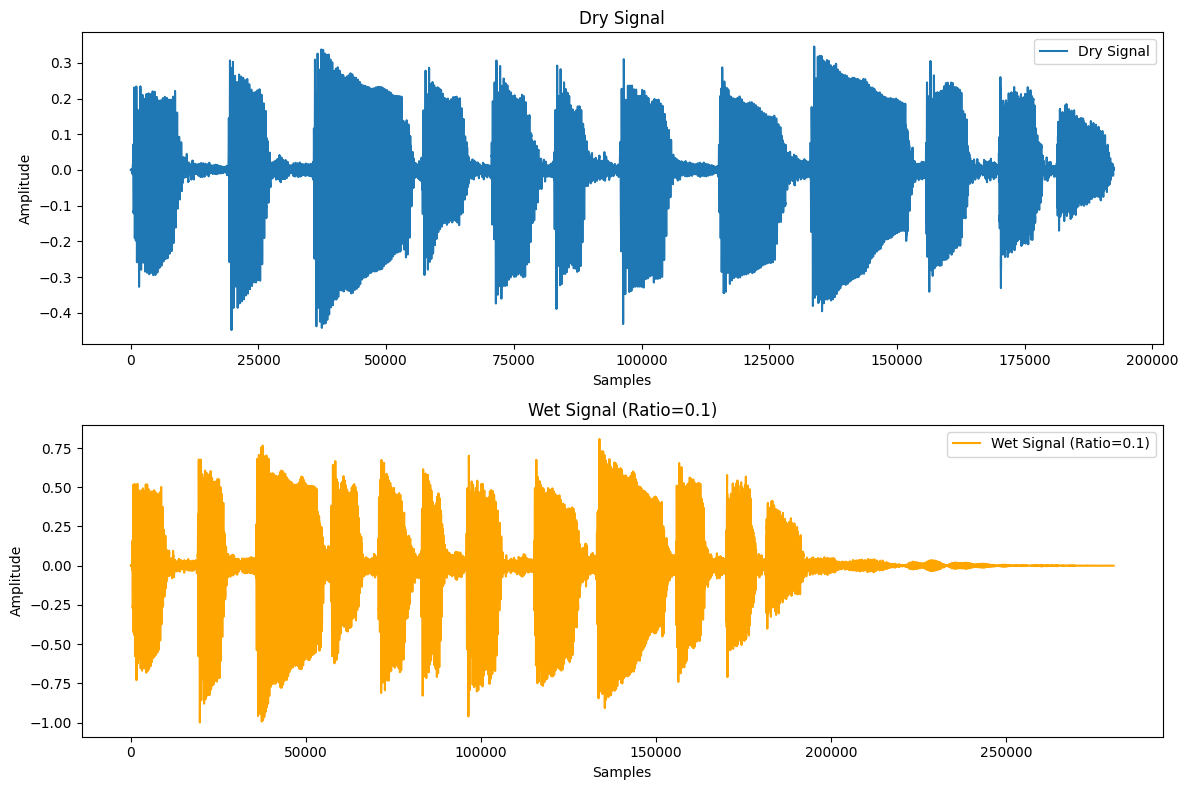

In [44]:
# PLOT WET AND DRY SIGNALS
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# PLOT DRY SIGNAL
ax[0].plot(dry_signal, label="Dry Signal")  # Display a small part of the signal
ax[0].set_title("Dry Signal")
ax[0].set_xlabel("Samples")
ax[0].set_ylabel("Amplitude")
ax[0].legend()

# PLOT WET SIGNAL
ax[1].plot(wet_signal, label=f"Wet Signal (Ratio={ratio})", color='orange')  # Display a small part of the signal
ax[1].set_title(f"Wet Signal (Ratio={ratio})")
ax[1].set_xlabel("Samples")
ax[1].set_ylabel("Amplitude")
ax[1].legend()

plt.tight_layout()
plt.show()

#----------------------------------------------------------------------------------------------------------------------

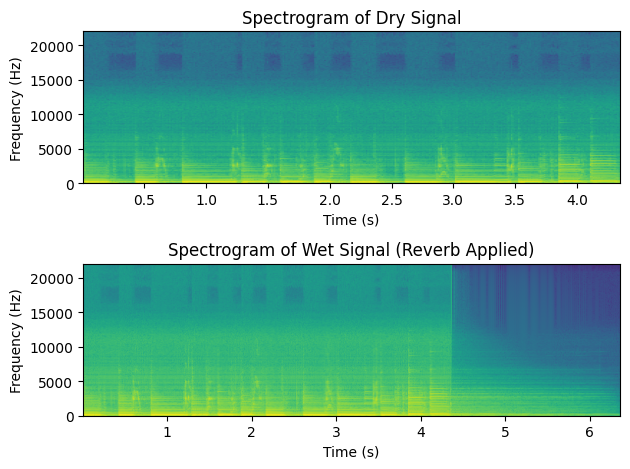

In [45]:
#DRY SIGNAL SPECTROGRAM
plt.subplot(2, 1, 1)
plt.specgram(dry_signal, NFFT=1024, Fs=SR_audio, noverlap=512, cmap='viridis')
plt.title("Spectrogram of Dry Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

#WET SIGNAL SPECTROGRAM
plt.subplot(2, 1, 2)
plt.specgram(wet_signal, NFFT=1024, Fs=SR_audio, noverlap=512, cmap='viridis')
plt.title("Spectrogram of Wet Signal (Reverb Applied)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------------------------------------